In [1]:
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
df1 = pl.read_csv("ingested.csv")
df2 = pl.read_csv("ingested_2015.csv")
df = df1.vstack(df2)

df_filter = df.filter(
    (pl.col("year_of_sale").is_in([2022, 2023, 2024])),
).with_columns(
    (pl.col("price").ge(1000000).cast(pl.Int64).alias("ge_1M")),
)
display(df_filter.sample())
print(list(df_filter.columns))

address,lease_remaining,minimum_floor,maximum_floor,built_year,sqft,sqm,flat_type,road,town,year_of_sale,month_of_sale,months_ago,price,psf,band_name,price_is_geq_one_million,ge_1M
str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64,f64,str,i64,i64
"""308C PUNGGOL WALK""",91,7,9,2016,721,67,"""3 ROOM""","""PUNGGOL WALK""","""PUNGGOL""",2022,10,26,469888,651.71,"""90 - 94""",0,0


['address', 'lease_remaining', 'minimum_floor', 'maximum_floor', 'built_year', 'sqft', 'sqm', 'flat_type', 'road', 'town', 'year_of_sale', 'month_of_sale', 'months_ago', 'price', 'psf', 'band_name', 'price_is_geq_one_million', 'ge_1M']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'ANG MO KIO'),
  Text(1, 0, 'BEDOK'),
  Text(2, 0, 'BISHAN'),
  Text(3, 0, 'BUKIT BATOK'),
  Text(4, 0, 'BUKIT MERAH'),
  Text(5, 0, 'BUKIT PANJANG'),
  Text(6, 0, 'BUKIT TIMAH'),
  Text(7, 0, 'CENTRAL AREA'),
  Text(8, 0, 'CLEMENTI'),
  Text(9, 0, 'GEYLANG'),
  Text(10, 0, 'HOUGANG'),
  Text(11, 0, 'JURONG EAST'),
  Text(12, 0, 'KALLANG/WHAMPOA'),
  Text(13, 0, 'MARINE PARADE'),
  Text(14, 0, 'PASIR RIS'),
  Text(15, 0, 'PUNGGOL'),
  Text(16, 0, 'QUEENSTOWN'),
  Text(17, 0, 'SENGKANG'),
  Text(18, 0, 'SERANGOON'),
  Text(19, 0, 'TAMPINES'),
  Text(20, 0, 'TOA PAYOH'),
  Text(21, 0, 'WOODLANDS'),
  Text(22, 0, 'YISHUN')])

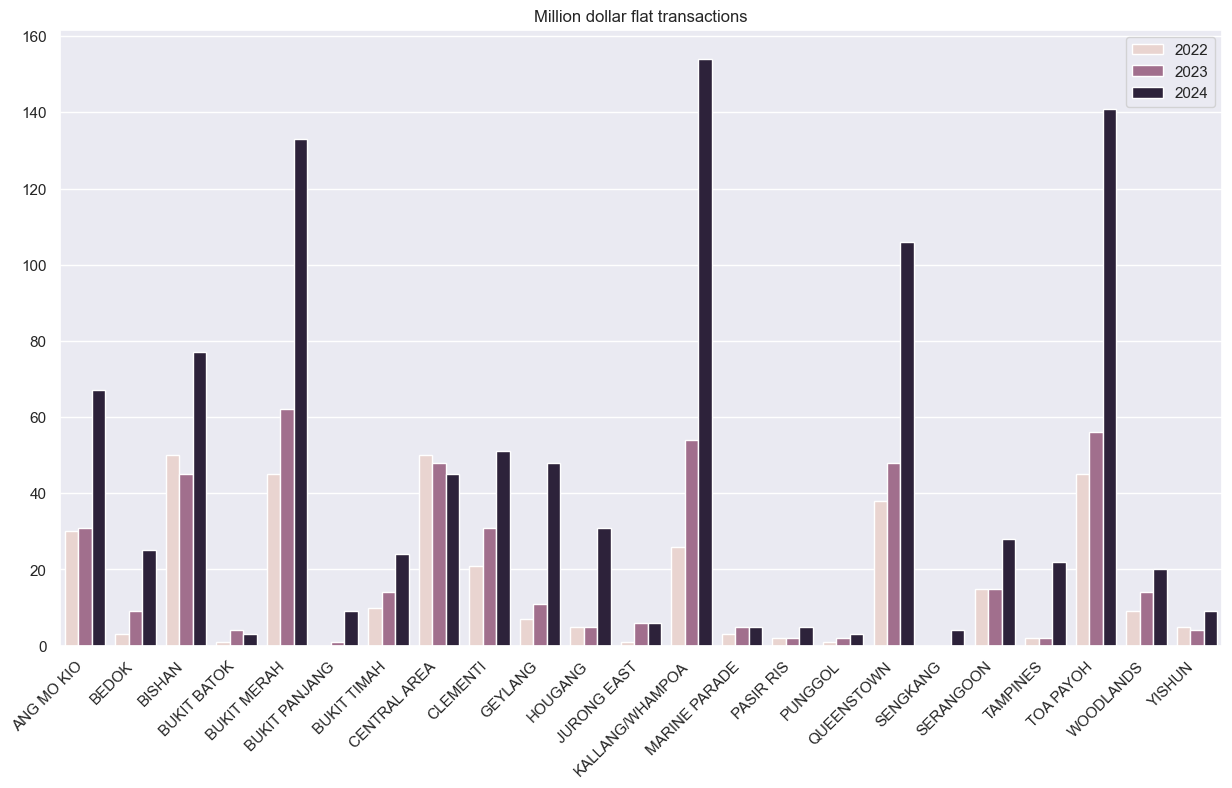

In [3]:
df_twn = df.filter(
    pl.col("price_is_geq_one_million").eq(1),
    pl.col("year_of_sale").is_in([2022, 2023, 2024])
).group_by(
    "year_of_sale", "town"
).agg(
    pl.col("address").len().alias("count_transactions")
).sort(
    "town", "year_of_sale"
)

plt.figure(figsize=(15, 8))  # Width: 15 inches, Height: 8 inches
sns.barplot(
    x=df_twn.select("town").to_numpy().flatten(), 
    y=df_twn.select("count_transactions").to_numpy().flatten(),
    hue=df_twn.select("year_of_sale").to_numpy().flatten(),
)
plt.title("Million dollar flat transactions")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

In [4]:
df_filter = df.filter(
    (pl.col("year_of_sale").ge(2015))
)
df_yearly = df_filter.group_by("year_of_sale").agg(pl.col("address").len().alias("count_txns")).sort("year_of_sale")
display(df_yearly)

year_of_sale,count_txns
i64,u32
2015,17780
2016,19373
2017,20509
2018,21561
2019,22186
2020,23333
2021,29087
2022,26720
2023,25755


Text(0, 0.5, 'Number of Transactions')

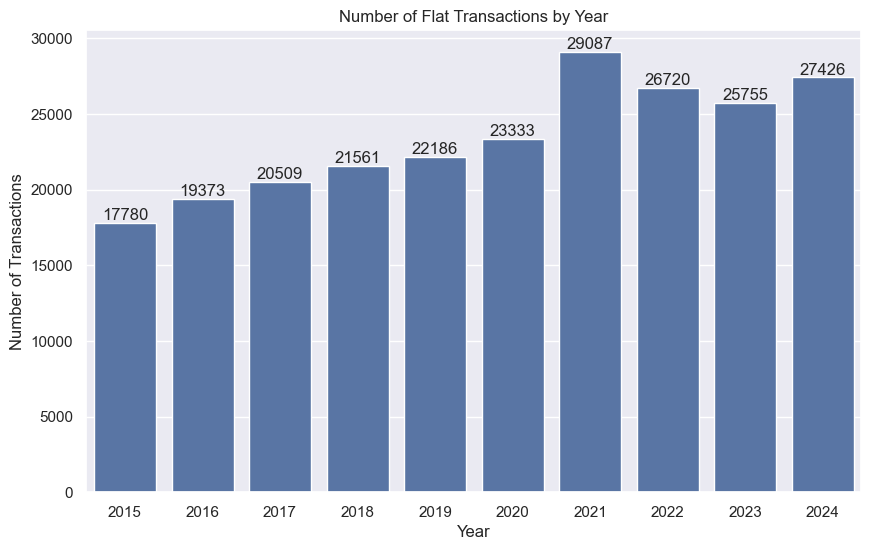

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=df_yearly.select("year_of_sale").to_numpy().flatten(), 
    y=df_yearly.select("count_txns").to_numpy().flatten(),
)

# Add value labels on top of each bar
for i, v in enumerate(df_yearly.select("count_txns").to_numpy().flatten()):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title("Number of Flat Transactions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")